<a href="https://colab.research.google.com/github/sahil07-rg/Vibrational-analysis/blob/main/Vibrational_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total samples: 20480


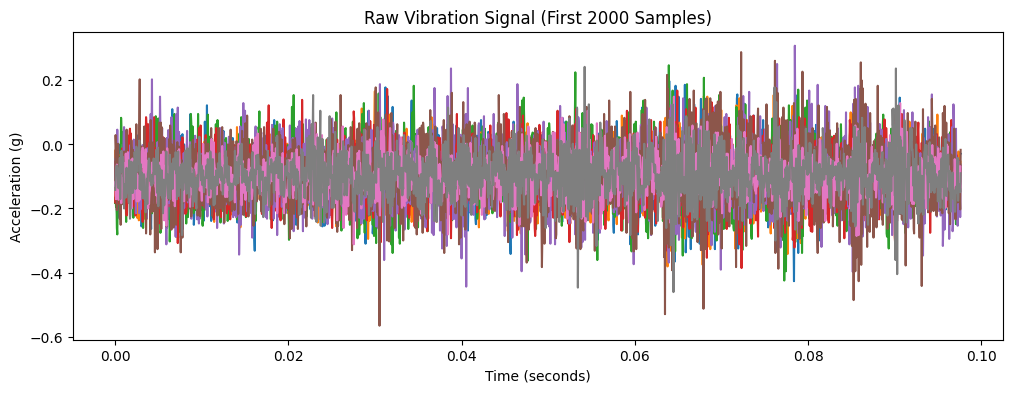

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt
# Load raw vibration data
data = np.loadtxt("2003.10.22.12.06.24")

Fs = 20480  # Sampling rate (Hz)
t = np.arange(len(data)) / Fs

print("Total samples:", len(data))
plt.figure(figsize=(12,4))
plt.plot(t[:2000], data[:2000])
plt.xlabel("Time (seconds)")
plt.ylabel("Acceleration (g)")
plt.title("Raw Vibration Signal (First 2000 Samples)")
plt.show()

In [ ]:
data_dc = data - np.mean(data)
print("Mean before:", np.mean(data))
print("Mean after :", np.mean(data_dc))

Mean before: -0.09286718139648438
Mean after : 4.206704429243757e-18


In [ ]:
mean = np.mean(data_dc)
std = np.std(data_dc)

z_scores = (data_dc - mean) / std
outliers = np.abs(z_scores) > 5
cleaned_data = np.copy(data_dc)
cleaned_data[outliers] = mean
from scipy.signal import medfilt

filtered = medfilt(cleaned_data, kernel_size=5)


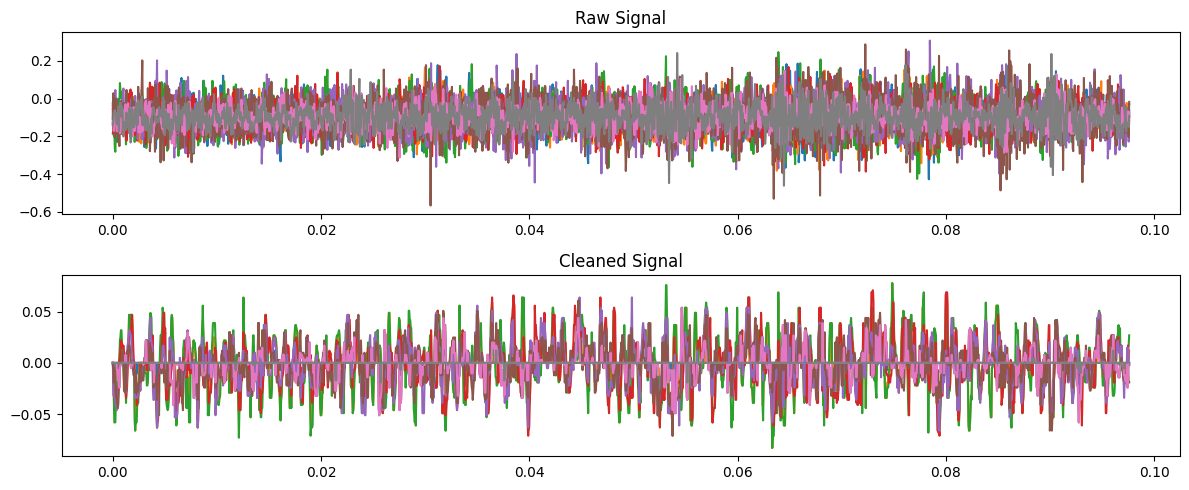

In [12]:
plt.figure(figsize=(12,5))

plt.subplot(3,1,1)
plt.plot(t[:2000], data[:2000])
plt.title("Raw Signal")

plt.subplot(3,1,2)
plt.plot(t[:2000], filtered[:2000])
plt.title("Cleaned Signal")


plt.tight_layout()
plt.show()